## EQUIPO MODELO

In [411]:
import numpy as np
import pickle
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
import matplotlib.pyplot as plt
import warnings
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [412]:
users = pd.read_csv('data/users_web.csv')

In [413]:
users

,Date,Users
0,1/1/2020,13
1,2/1/2020,17
2,3/1/2020,13
3,4/1/2020,4
4,5/1/2020,10
...,...,...
846,26/4/2022,63
847,27/4/2022,64
848,28/4/2022,46
849,29/4/2022,29


In [414]:
users = pd.read_csv('data/users_web.csv', index_col = 'Date')
users.head()

,Users
Date,
1/1/2020,13
2/1/2020,17
3/1/2020,13
4/1/2020,4
5/1/2020,10


In [415]:
users

,Users
Date,
1/1/2020,13
2/1/2020,17
3/1/2020,13
4/1/2020,4
5/1/2020,10
...,...
26/4/2022,63
27/4/2022,64
28/4/2022,46


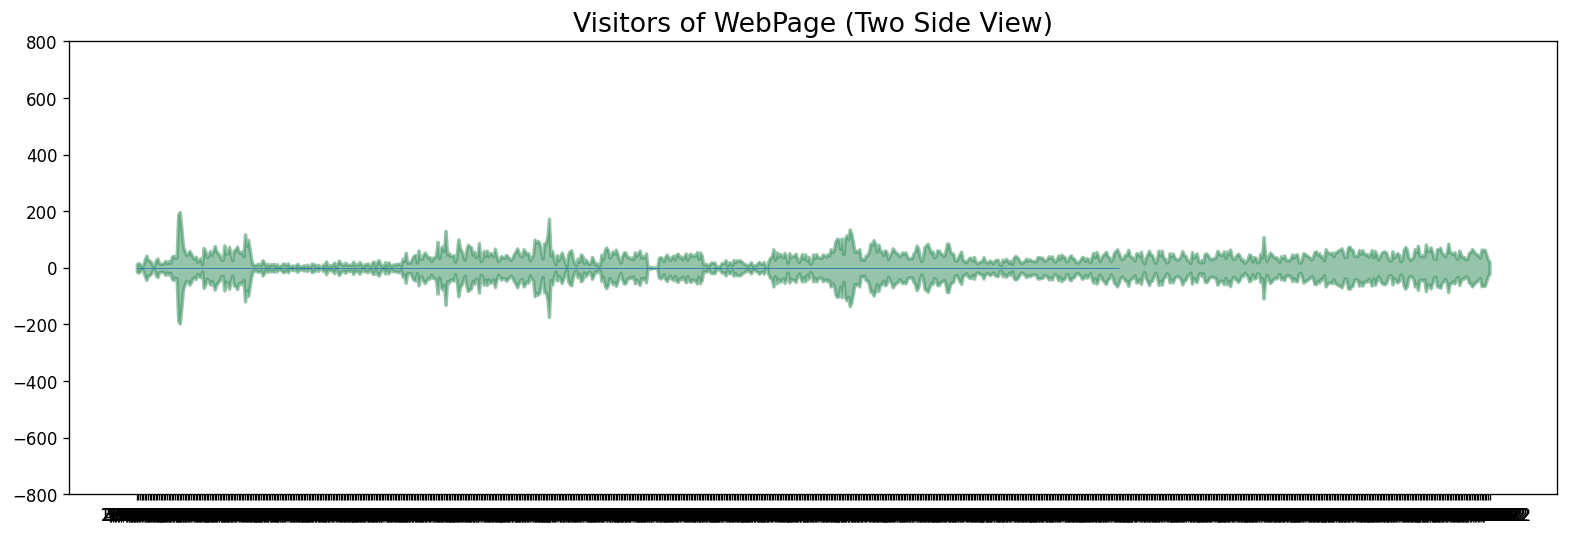

In [408]:
users = pd.read_csv('data/users_web.csv', index_col = 'Date')

x = users.index.values
y1 = users['Users'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Visitors of WebPage (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(users.index), xmax=np.max(users.index), linewidth=.5)
plt.show()

In [409]:
users

,Users
Date,
1/1/2020,13
2/1/2020,17
3/1/2020,13
4/1/2020,4
5/1/2020,10
...,...
26/4/2022,63
27/4/2022,64
28/4/2022,46


In [410]:
users.head()

,Users
Date,
1/1/2020,13
2/1/2020,17
3/1/2020,13
4/1/2020,4
5/1/2020,10


In [416]:
users.info

<bound method DataFrame.info of            Users
Date            
1/1/2020      13
2/1/2020      17
3/1/2020      13
4/1/2020       4
5/1/2020      10
...          ...
26/4/2022     63
27/4/2022     64
28/4/2022     46
29/4/2022     29
30/4/2022     21

[851 rows x 1 columns]>

In [417]:
users.describe()

,Users
count,851.000000
mean,39.226792
std,23.484594
min,0.000000
25%,23.000000
50%,38.000000
75%,51.000000
max,197.000000


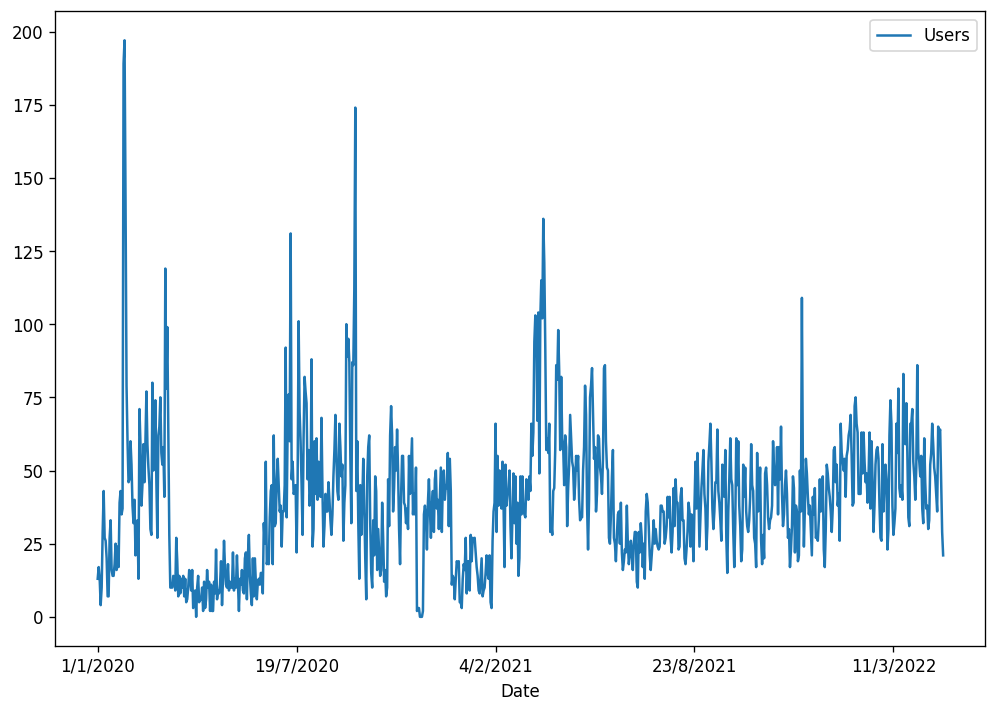

In [418]:
users.plot();

In [419]:
users['Users']

Date
1/1/2020     13
2/1/2020     17
3/1/2020     13
4/1/2020      4
5/1/2020     10
             ..
26/4/2022    63
27/4/2022    64
28/4/2022    46
29/4/2022    29
30/4/2022    21
Name: Users, Length: 851, dtype: int64

In [420]:
len(users)

851

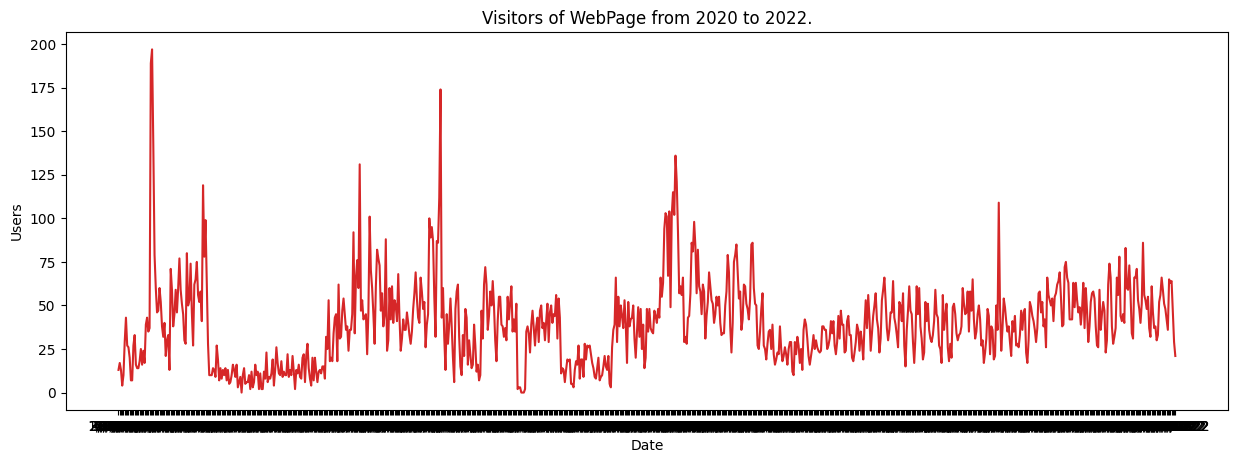

In [421]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Users', dpi=100):
    plt.figure(figsize=(15,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(users, x=users.index, y=users.Users, title ='Visitors of WebPage from 2020 to 2022.') 

In [422]:
from statsmodels.tsa.stattools import adfuller
adfuller(users['Users'])[1]

0.0025335273627727127

<AxesSubplot:xlabel='Date'>

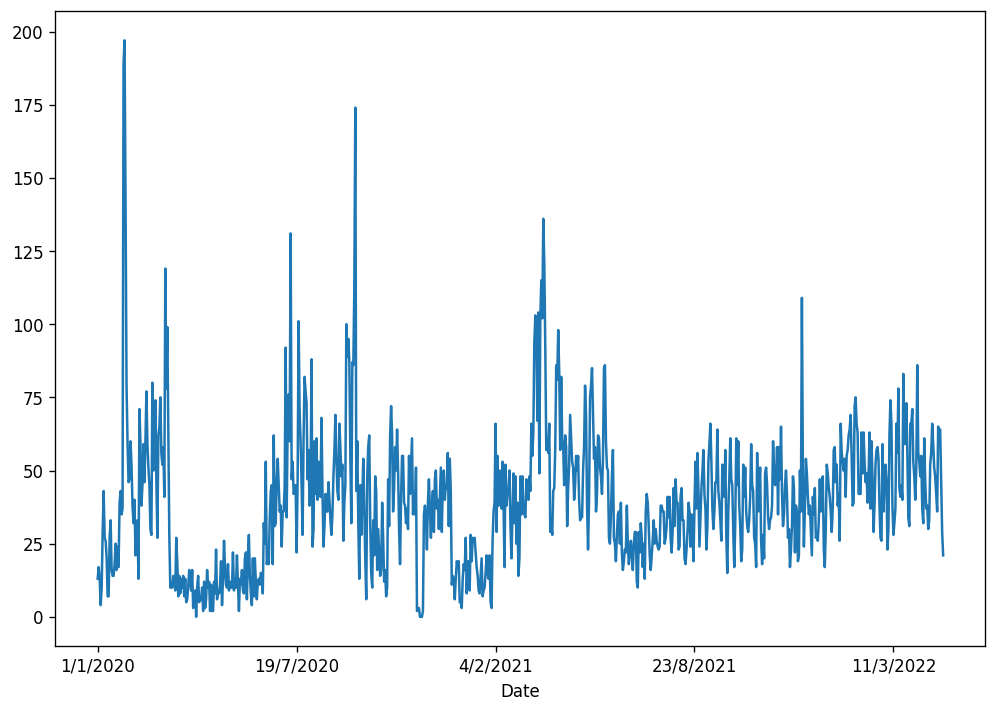

In [423]:
users['Users'].plot()

In [439]:
len(users)

851

In [450]:
train = users['Users'][:800]
test = users['Users'][800:]

In [451]:
print(train.shape)
print(test.shape)

(800,)
(51,)


## HASTA AQUÍ BIEN INDEXADO

## TRANSFORMACIÓN LOGARÍTMICA

In [452]:
users['Users'] = np.log(users['Users']+1)


<AxesSubplot:xlabel='Date'>

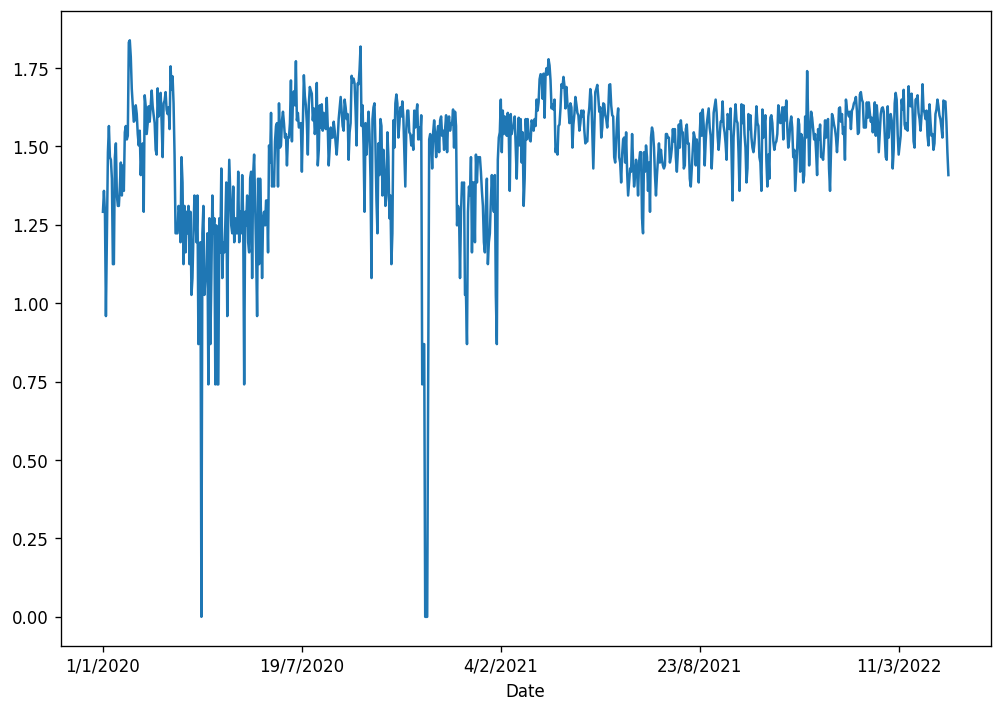

In [453]:
users['Users'].plot()

In [454]:
train = users['Users'][:800]
test = users['Users'][800:]

In [455]:
print(train.shape)
print(test.shape)

(800,)
(51,)


In [443]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model = auto_arima(
    train,
    start_p=1,
    start_q=1,
    max_d=3,
    max_p=5,
    max_q=5,
    stationary=False
    # trace=True
)

In [444]:
model

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [445]:
predictions = model.predict(51)
predictions

array([3.59568845, 3.58838693, 3.56837767, 3.85224463, 3.96099613,
       4.0199226 , 3.8726326 , 3.63721215, 3.5843563 , 3.58350722,
       3.84421557, 3.95992259, 4.01660832, 3.86521779, 3.64820177,
       3.57985405, 3.59596972, 3.83715802, 3.95916622, 4.0120465 ,
       3.85999018, 3.65663657, 3.57763153, 3.60649785, 3.83113928,
       3.95841153, 4.00678054, 3.8562925 , 3.66316075, 3.57717466,
       3.61540039, 3.8261009 , 3.95747416, 4.00118158, 3.85364005,
       3.66827553, 3.57805932, 3.62296111, 3.8219446 , 3.9562626 ,
       3.99549541, 3.85168143, 3.67236519, 3.57994224, 3.62943063,
       3.81855505, 3.95474584, 3.98987785, 3.85016663, 3.67572013,
       3.58255038])

In [446]:
test.values

array([3.36729583, 3.49650756, 3.63758616, 4.20469262, 4.04305127,
       4.36944785, 3.80666249, 3.73766962, 3.8286414 , 3.71357207,
       4.4308168 , 4.11087386, 4.09434456, 4.30406509, 4.04305127,
       3.55534806, 3.4657359 , 4.20469262, 4.20469262, 4.27666612,
       3.98898405, 3.8918203 , 3.71357207, 3.95124372, 4.46590812,
       4.04305127, 3.98898405, 3.8918203 , 4.02535169, 3.63758616,
       3.49650756, 4.12713439, 3.8501476 , 3.63758616, 3.66356165,
       3.4339872 , 3.52636052, 3.97029191, 4.04305127, 4.20469262,
       4.09434456, 3.95124372, 3.8918203 , 3.76120012, 3.61091791,
       4.18965474, 4.15888308, 4.17438727, 3.8501476 , 3.40119738,
       3.09104245])

In [447]:
print("MAE", mean_absolute_error(test.values, predictions))
print("MAPE", mean_absolute_percentage_error(test.values, predictions))

MAE 0.2110412968331476
MAPE 0.05355790844050849


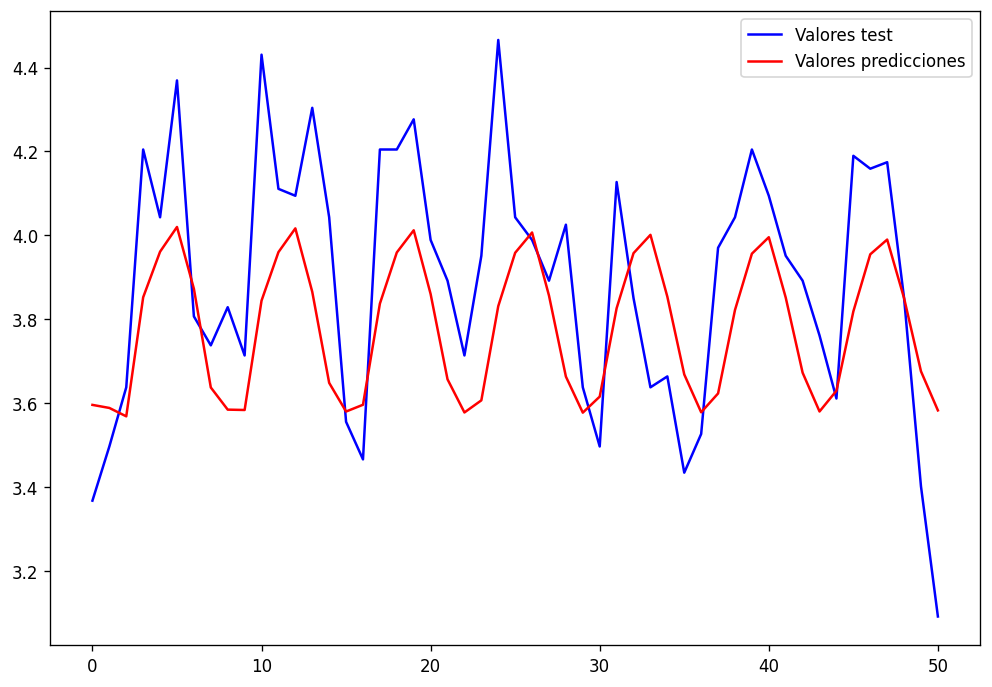

In [448]:
plt.plot(test.values, color="blue", label = "Valores test")
plt.plot(predictions, color="red", label = "Valores predicciones")
plt.legend();

In [449]:
#model_xgb = Pipeline (steps = [
 #                    ('scaler', MinMaxScaler()),
 #                    ('xgb', XGBClassifier())]
 #                   )


#params = {
#          'xgbmax_depth' : range(3,10),
#          'xgbmin_child_weight': range(1,50,3),
#          'xgbalpha': np.arange(0,0.5,0.1),
#          'xgbeta': np.arange(0.1,0.3,0.1)
#         }


#model_xgb_rsc = RandomizedSearchCV(model_xgb, params, cv=5, scoring='accuracy',n_iter= 100)
#model_xgb_rsc.fit(X_train, y_train)

In [464]:
for i in range(12,0,-1):
    users['t-'+str(i)] = users['Users'].shift(i)

users.dropna(inplace=True)
users

,Users,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Date,,,,,,,,,,,,,
5/2/2020,1.539779,1.565317,1.522467,1.534194,1.832105,1.838686,1.785548,1.683065,1.631370,1.579009,1.583341,1.631370,1.603479
6/2/2020,1.503301,1.522467,1.534194,1.832105,1.838686,1.785548,1.683065,1.631370,1.579009,1.583341,1.631370,1.603479,1.539779
7/2/2020,1.550446,1.534194,1.832105,1.838686,1.785548,1.683065,1.631370,1.579009,1.583341,1.631370,1.603479,1.539779,1.503301
8/2/2020,1.408800,1.832105,1.838686,1.785548,1.683065,1.631370,1.579009,1.583341,1.631370,1.603479,1.539779,1.503301,1.550446
9/2/2020,1.489299,1.838686,1.785548,1.683065,1.631370,1.579009,1.583341,1.631370,1.603479,1.539779,1.503301,1.550446,1.408800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26/4/2022,1.640720,1.539779,1.489299,1.509918,1.603479,1.618011,1.649561,1.628131,1.599639,1.587564,1.560500,1.528427,1.646667
27/4/2022,1.643721,1.489299,1.509918,1.603479,1.618011,1.649561,1.628131,1.599639,1.587564,1.560500,1.528427,1.646667,1.640720
28/4/2022,1.579009,1.509918,1.603479,1.618011,1.649561,1.628131,1.599639,1.587564,1.560500,1.528427,1.646667,1.640720,1.643721


In [466]:
X = users.iloc[:,1:]
y = users['Users']

X_train = X[:800]
X_test = X[800:]

y_train = y[:800]
y_test = y[800:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 12)
(16, 12)
(800,)
(16,)
